## In class # 9


In [2]:
from arcgis.gis import GIS
gis = GIS("home")
print("Successfully logged in as: " + gis.properties.user.username)

Successfully logged in as: sango.fon


#### Import the libraries!

In [3]:
import os
import arcpy
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Let’s create our directory
home_dir = '/arcgis/home'
new_dirname = 'Asthma'
lesson_dir = os.path.join(home_dir, new_dirname)


In [5]:
os.mkdir(lesson_dir)


In [6]:
dataset = '/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb.zip'

In [7]:
#Let’s unzip
zip_ref = zipfile.ZipFile(dataset, 'r')

In [8]:
zip_ref.extractall(lesson_dir)


In [9]:
asthma = os.path.join(lesson_dir, 'Asthma_InitialAnalysis.gdb')


In [10]:
arcpy.env.workspace = asthma

In [11]:
print(arcpy.env.workspace)


/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb


In [12]:
#List the feature classes
datasets = arcpy.ListDatasets()
datasets = [''] + datasets if datasets is not None else []

for ds in datasets:
    if ds:
        if arcpy.Describe(ds).dataType == "Feature Dataset":
            for fc in arcpy.ListFeatureClasses(feature_dataset=ds):
                path = os.path.join(arcpy.env.workspace, ds, fc)
                print(path)
        else:
            for fc in arcpy.ListFeatureClasses():
                path = os.path.join(arcpy.env.workspace, fc)
                print(path)

                






/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/Connecticut_Tracts
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_Conn
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/BlockGroups_PredictedAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_Enriched2
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_XYTableToPoint
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/C

/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/Connecticut_Tracts
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_Conn
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/BlockGroups_PredictedAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_Enriched2
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_XYTableToPoint
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/C

/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/Connecticut_Tracts
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/annual_conc_by_monitor_2010_Conn
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutBGs_WithAsthma_Enriched
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/BlockGroups_PredictedAsthma
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/ConnecticutTracts_Enriched2
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_XYTableToPoint
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/TRI_2010_Air_wTotalRelease
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/C

In [13]:
#List the Rasters
for ds in datasets:
    if ds:
        if arcpy.Describe(ds).datatype == "RasterDataset":
            path = os.path.join(arcpy.env.workspace, ds)
            print(path)





/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/GALayerToRas1
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/RoadDensity
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/DistanceToAirToxicReleases
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/Kriging_AirQuality
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/Idw_AirQuality
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/AirQualityRaster
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/AirQualityEBK
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/DistanceToPrimarySecondaryRoads
/arcgis/home/Asthma/Asthma_InitialAnalysis.gdb/RoadDensity_ForViz


In [15]:
asthma_path = os.path.join(asthma, 'TractswithAsthma_Projected', "")

In [16]:
tract_sedf = pd.DataFrame.spatial.from_featureclass(asthma_path)
tract_sedf.spatial.project(spatial_reference={'wkid': 3857})

True

In [17]:
tract_sedf.head()

,OBJECTID_1,ObjectID,STATE_FIPS,CNTY_FIPS,STCOFIPS,TRACT,FIPS,POP2010,POP10_SQMI,POP2012,...,industry_indmanu_cy_p,industry_indcons_cy_p,industry_indmin_cy_p,industry_indagri_cy_p,industry_indtran_cy_p,industry_unemprt_cy,health_x8002_x_a,households_acshhbpov_p,households_acshhapov_p,SHAPE
0,1,12847,09,001,09001,010101,09001010101,4476,351.1,4454,...,2.52,6.57,0.0,0.55,0.00,4.1,10213.60,12.02,87.98,"{""rings"": [[[-8198749.507912934, 5021805.12917..."
1,2,12848,09,001,09001,010102,09001010102,4330,330.0,4328,...,3.59,4.57,0.3,0.00,0.73,4.5,12896.88,7.19,92.81,"{""rings"": [[[-8193156.48533997, 5027165.476578..."
2,3,12849,09,001,09001,010201,09001010201,3421,775.7,3489,...,5.01,2.43,0.0,0.00,1.88,2.6,13360.91,4.44,95.56,"{""rings"": [[[-8196838.721007202, 5023675.21989..."
3,4,12850,09,001,09001,010202,09001010202,5359,1402.9,5269,...,2.10,6.83,0.0,0.00,1.40,4.3,9921.79,1.24,98.76,"{""rings"": [[[-8190039.435066799, 5020903.23340..."
4,5,12851,09,001,09001,010300,09001010300,4010,1078.0,4032,...,7.37,0.29,0.0,0.00,1.66,5.5,10646.40,2.72,97.28,"{""rings"": [[[-8197306.487002994, 5019559.45284..."


In [18]:
#Let’s Create our map
asthma_map = gis.map("Connecticut")
asthma_map


MapView(layout=Layout(height='400px', width='100%'))

In [19]:
tract_sedf.spatial.plot(asthma_map,
col='U19Rate',
renderer_type='c',
method='esriClassifyNaturalBreaks',
class_count=5,
cmap='OrRd',
alpha=0.75,
line_width=0.5)


True

In [20]:
#Variables Influencing Hospitalization Rates
variables = ['healthpersonalcare_mp32001a_b_p',
'householdincome_pci_cy',
'householdincome_medhinc_cy',
'educationalattainment_hsgrad_cy_p',
'educationalattainment_bachdeg_cy_p',
'industry_unemprt_cy',
'health_x8002_x_a',
'households_acshhbpov_p']

In [21]:
asthma_desc = arcpy.Describe(asthma_path)
for field in asthma_desc.fields:
    if field.name in variables:
        print(f"{field.name:40}{field.aliasName}")




healthpersonalcare_mp32001a_b_p         Smoked cigarettes in last 12 months: Percent
householdincome_pci_cy                  2018 Per Capita Income
householdincome_medhinc_cy              2018 Median Household Income
educationalattainment_hsgrad_cy_p       2018 Education: High School Diploma: Percent
educationalattainment_bachdeg_cy_p      2018 Education: Bachelor's Degree: Percent
industry_unemprt_cy                     2018 Unemployment Rate
health_x8002_x_a                        Health Insurance: Average
households_acshhbpov_p                  ACS HHs: Inc Below Poverty Level: Percent


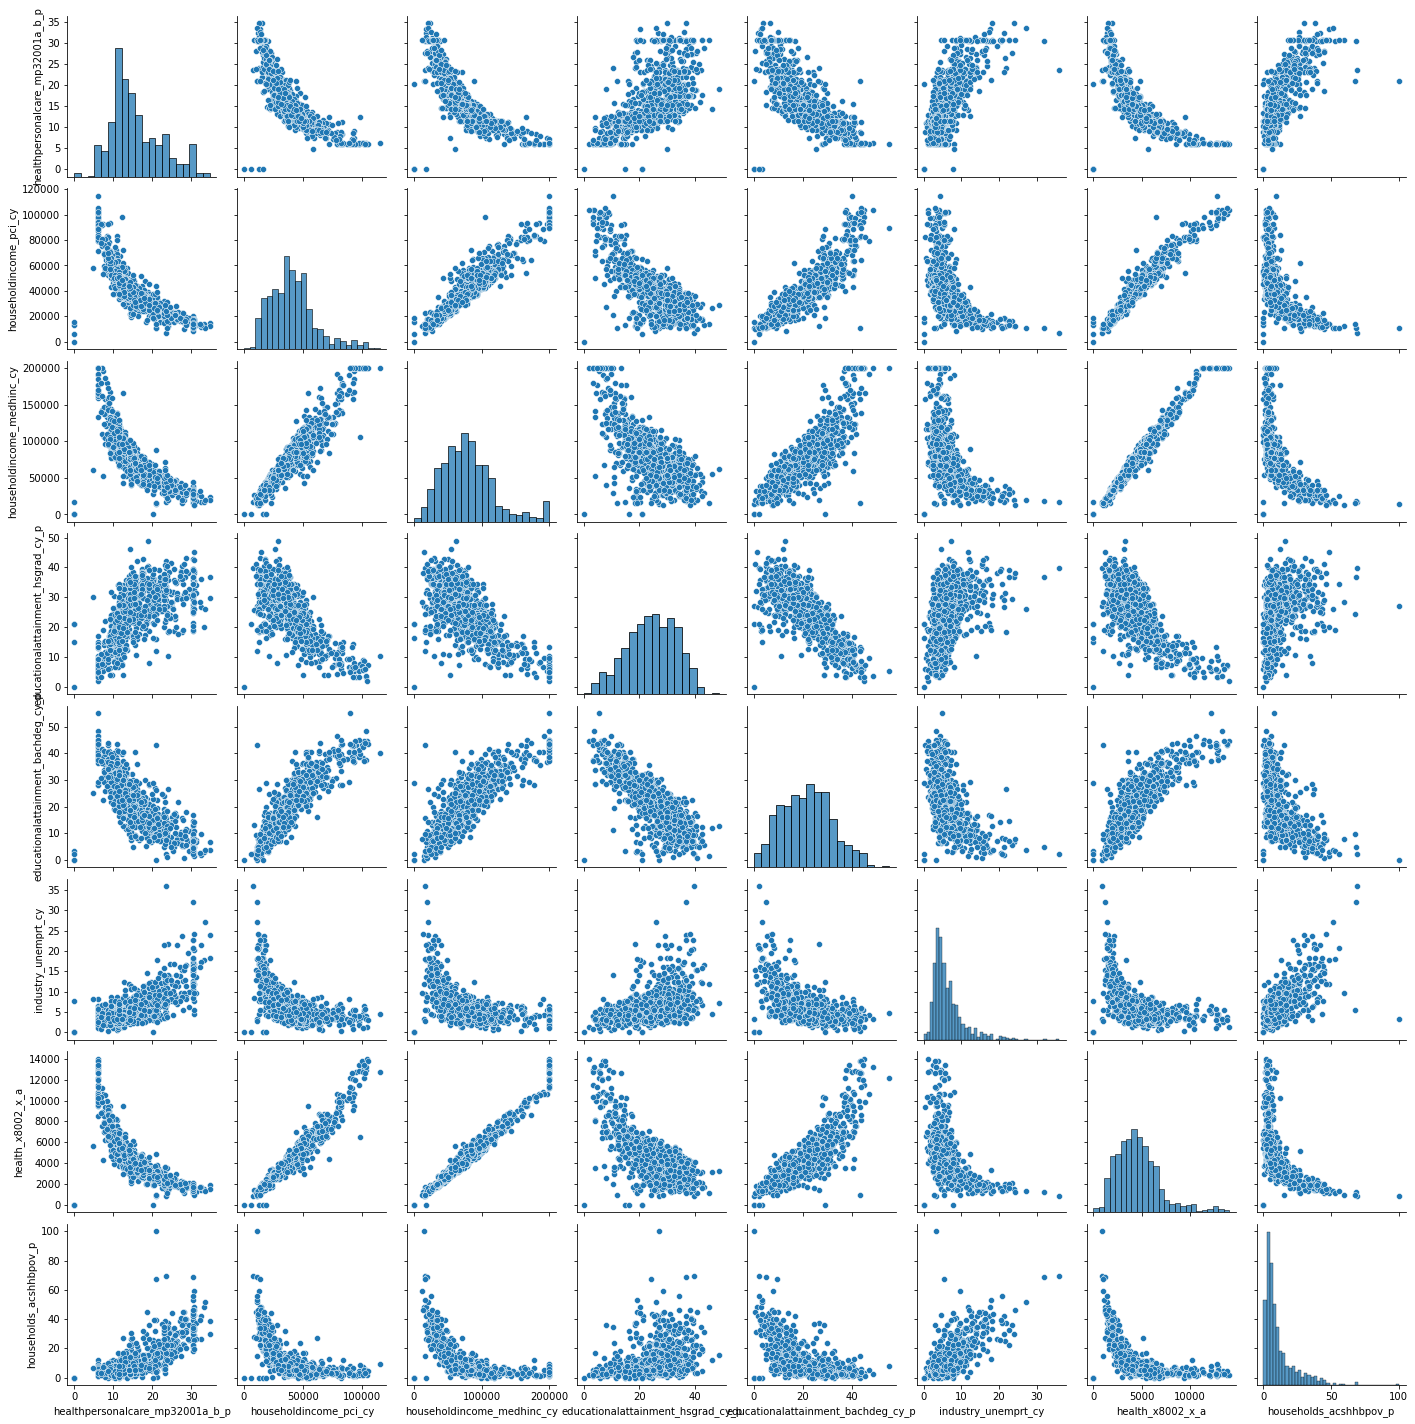

In [22]:
#Let’s visualize our data
sns.pairplot(tract_sedf[variables])

In [23]:
#Setting environment variables
arcpy.env.randomGenerator = "540977 ACM599"
arcpy.env.overwriteOutput = True

In [24]:
#Training the Model
prediction_type = "TRAIN"
input_fc = asthma_path
predict_var = "U19Rate"
categorical_var = None

In [30]:
#Define Explanatory Variables
explanatory_var0 = "educationalattainment_bachdeg_cy_p"
explanatory_var1 = "educationalattainment_hsgrad_cy_p"
explanatory_var2 = "industry_unemprt_cy"
explanatory_var3 = "households_acshhbpov_p"
explanatory_var4 = "health_x8002_x_a"
explanatory_var5 = "healthpersonalcare_mp32001a_b_p"
explanatory_vars = f"{explanatory_var0} false;{explanatory_var1} false;{explanatory_var2} false;{explanatory_var3} false;{explanatory_var4} false;{explanatory_var5} false"

In [31]:
#We can also specify distance features calculating how far input eatures are from distance features, in this case we will set it to none.
distance_fc = None

In [32]:
#Define explanatory rasters
explanatory_rst0 = os.path.join(asthma, 'AirQualityEBK')
explanatory_rst1 = os.path.join(asthma, 'DistanceToAirToxicReleases')
explanatory_rst2 = os.path.join(asthma, 'DistanceToPrimarySecondaryRoads')
explanatory_rst3 = os.path.join(asthma, 'RoadDensity')
explanatory_raster = f"{explanatory_rst0} false;{explanatory_rst1} false;{explanatory_rst2} false;{explanatory_rst3} false"

In [33]:
fc_to_predict = None
out_fc = None
out_raster = None
match_exp_var = None
match_dist_fc = None
match_exp_raster = None
out_trained_fc = None
out_var_importance_table = os.path.join(asthma,'Asthma_Train_Variable_Importance_Table')
raster_values = True
num_trees = 100
min_leaf_size = None
max_level = None
sample_size = 100
fields_to_try = None
perc_training = 10
output_classification_table = ''
output_validation_table = ''
compensate_sparse_categories = ''
number_validation_runs = 100
calculate_uncertainty = False

In [34]:
randomforest_toolrun = arcpy.stats.Forest(prediction_type, input_fc, predict_var, categorical_var,
explanatory_vars, distance_fc, explanatory_raster,
fc_to_predict, out_fc, out_raster, match_exp_var,
match_dist_fc, match_exp_raster, out_trained_fc,
out_var_importance_table, raster_values, num_trees,
min_leaf_size, max_level, sample_size, fields_to_try,
perc_training, output_classification_table,
output_validation_table, compensate_sparse_categories,
number_validation_runs, calculate_uncertainty)

Random Seed: 540977
WARNING 000642: Problems reading 238 of 829 total records.
WARNING 000848: Features with bad records (only includes first 30): OBJECTID_1 = 1, 2, 3, 5, 8, 10, 13, 14, 16, 17, 19, 22, 23, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60.

-------------- Model Characteristics ---------------
Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               13-24
Mean Tree Depth                                   18
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               3
% of Training Data Excluded for Validation        10

-------------- Model Out of Bag Errors --------------
Number of Trees                      50            100
MSE                            4676.028       4439.790
% of variation explained         67.005         68.672

----------------------------- Top Variable Importance -------------------------

In [35]:
info = randomforest_toolrun.getMessages().split('\n')[6:-2]
print(*info, sep="\n")

Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               13-24
Mean Tree Depth                                   18
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               3
% of Training Data Excluded for Validation        10

-------------- Model Out of Bag Errors --------------
Number of Trees                      50            100
MSE                            4676.028       4439.790
% of variation explained         67.005         68.672

----------------------------- Top Variable Importance -----------------------------
Variable                                                  Importance               %
Health Insurance: Average                                 1893440.68              26
Smoked cigarettes in last 12 months: Percent              1492525.78              21
ACS HHs: Inc Below Poverty Level: Percent                 1236741.29 

In [36]:
# Convert the variable importance table to pandas dataframe for creating the box-plot
arcpy.conversion.TableToTable(out_var_importance_table, home_dir, "vitcsv.csv")
var_importance = pd.read_csv("/arcgis/home/vitcsv.csv")
var_csv = var_importance.drop(columns=["OID_"])
var_csv = var_csv.rename(columns={"HEALTHPERSONALCARE_MP32001A_B_P": "Smoked cigarettes in last 12 months: Percent",
"HOUSEHOLDINCOME_PCI_CY": "2018 Per Capita Income",
"HOUSEHOLDINCOME_MEDHINC_CY": "2018 Median Household Income",
"EDUCATIONALATTAINMENT_HSGRAD_CY_P": "2018 Education: High School Diploma: Percent",
"EDUCATIONALATTAINMENT_BACHDEG_CY_P": "2018 Education: Bachelor's Degree: Percent",
"INDUSTRY_UNEMPRT_CY": "2018 Unemployment Rate",
"HEALTH_X8002_X_A": "Health Insurance: Average",
"HOUSEHOLDS_ACSHHBPOV_P": "ACS HHs: Inc Below Poverty Level: Percent",
"AIRQUALITYEBK": "Air Quality",
"DISTANCETOAIRTOXICRELEASES": "Distance to Air Toxic Releases",
"DISTANCETOPRIMARYSECONDARYROADS": "Distance to Primary and Secondary Roads",
"ROADDENSITY": "Road Density"
})


[Text(0.5, 1.0, 'Distribution of Variable Importance'),
 Text(0.5, 0, 'Importance Score'),
 Text(0, 0.5, 'Variable')]

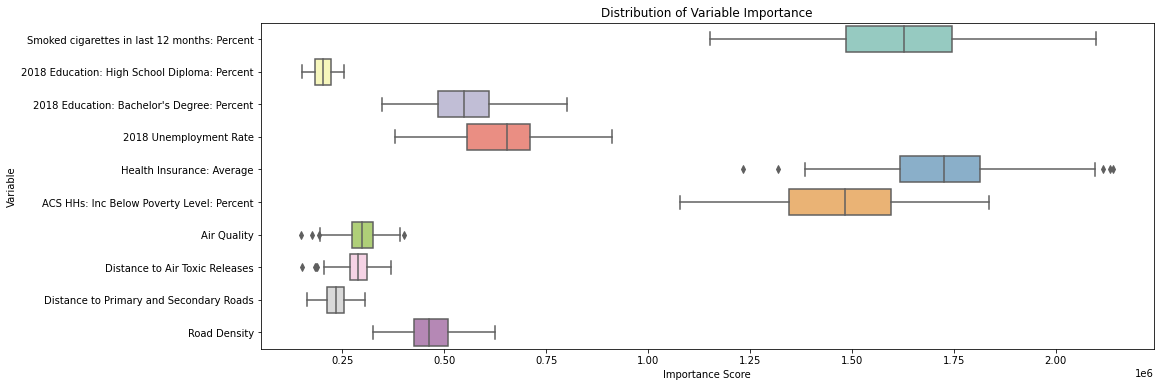

In [37]:
# Set the plot size for Variable Importance box-plot
plt.figure(figsize=(16, 6))
var_importance_boxplot = sns.boxplot(data=var_csv, orient="h", palette="Set3")
var_importance_boxplot.set(title="Distribution of Variable Importance",
xlabel="Importance Score", ylabel="Variable")

In [38]:
arcpy.env.randomGenerator = "667116 ACM599"
arcpy.env.overwriteOutput = True

In [39]:
prediction_type = "PREDICT_FEATURES"
input_fc = asthma_path
predict_var = "U19Rate"
categorical_var = None
fc_to_predict = os.path.join(asthma, 'ConnecticutBGs_WithAsthma_Enriched')
out_fc = os.path.join(asthma, 'Asthma_Predictions_Block_Groups')
out_raster = None
match_exp_var0A = 'educationalattainment_bachdeg_cy_p'
match_exp_var0B = '\"2018 Education: Bachelor\'s Degree: Percent\"'
match_exp_var1A = 'educationalattainment_hsgrad_cy_p'
match_exp_var1B = '\'2018 Education: High School Diploma: Percent\''
match_exp_var2A = 'industry_unemprt_cy'
match_exp_var2B = '\'2018 Unemployment Rate\''
match_exp_var3A = 'households_acshhbpov_p'
match_exp_var3B = '\'ACS HHs: Inc Below Poverty Level: Percent\''
match_exp_var4A = 'health_x8002_x_a'
match_exp_var4B = '\'Health Insurance: Average\''
match_exp_var5A = 'healthpersonalcare_mp32001a_b_p'
match_exp_var5B = '\'Smoked cigarettes in last 12 months: Percent\''
match_exp_var = f"{match_exp_var0A} {match_exp_var0B};{match_exp_var1A} {match_exp_var1B};{match_exp_var2A} {match_exp_var2B};{match_exp_var3A} {match_exp_var3B};{match_exp_var4A} {match_exp_var4B};{match_exp_var5A} {match_exp_var5B}"


In [40]:
match_dist_fc = None
match_raster0A = explanatory_rst0
match_raster0B = explanatory_rst0
match_raster1A = explanatory_rst1
match_raster1B = explanatory_rst1
match_raster2A = explanatory_rst2
match_raster2B = explanatory_rst2
match_raster3A = explanatory_rst3
match_raster3B = explanatory_rst3
match_exp_raster = f"{match_raster0A} {match_raster0B};{match_raster1A} {match_raster1B};{match_raster2A} {match_raster2B};{match_raster3A} {match_raster3B}"
out_trained_fc = None
out_var_importance_table = os.path.join(
asthma, 'Asthma_Prediction_Variable_Importance_Table')
raster_values = True
num_trees = 100
min_leaf_size = None
max_level = None
sample_size = 100
fields_to_try = None
perc_training = 10
output_classification_table = ''
output_validation_table = ""
compensate_sparse_categories = ''
number_validation_runs = 100
calculate_uncertainty = True


In [41]:
randomforest_predict_toolrun = arcpy.stats.Forest(prediction_type, input_fc, predict_var,
categorical_var, explanatory_vars, distance_fc,
explanatory_raster, fc_to_predict, out_fc,
out_raster, match_exp_var, match_dist_fc,
match_exp_raster, out_trained_fc,
out_var_importance_table, raster_values,
num_trees, min_leaf_size, max_level, sample_size,
fields_to_try, perc_training,
output_classification_table,
output_validation_table,
compensate_sparse_categories,
number_validation_runs,
calculate_uncertainty)

Random Seed: 667116
WARNING 000642: Problems reading 238 of 829 total records.
WARNING 000848: Features with bad records (only includes first 30): OBJECTID_1 = 1, 2, 3, 5, 8, 10, 13, 14, 16, 17, 19, 22, 23, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60.
WARNING 000642: Problems reading 49 of 2581 total records.
WARNING 000848: Features with bad records (only includes first 30): OBJECTID Null Values in Raster = 5, 76, 90, 123, 167, 177, 425, 458, 463, 480, 494, 524, 540, 569, 605, 636, 712, 717, 726, 731, 766, 798, 928, 940, 964, 1049, 1072, 1092, 1139, 1189.

-------------- Model Characteristics ---------------
Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               13-24
Mean Tree Depth                                   17
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               3
% of Training Data Excluded for Validation

In [42]:
#Once again, we can inspect our output messages to see how our model performed.
info = randomforest_predict_toolrun.getMessages().split('\n')[8:-2]
print(*info, sep="\n")


Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               13-24
Mean Tree Depth                                   17
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               3
% of Training Data Excluded for Validation        10

-------------- Model Out of Bag Errors --------------
Number of Trees                      50            100
MSE                            4832.040       4518.817
% of variation explained         65.454         67.693

----------------------------- Top Variable Importance -----------------------------
Variable                                                  Importance               %
Health Insurance: Average                                 1948755.19              27
ACS HHs: Inc Below Poverty Level: Percent                 1485648.50              20
Smoked cigarettes in last 12 months: Percent              1272023.36 

In [43]:
#We'll create a spatially-enabled dataframe to visualize the feature class output from the prediction run of the tool:
out_sdef = pd.DataFrame.spatial.from_featureclass(out_fc)


In [44]:
#Publish the dataframe as a feature layer to the Organization.
asthma_item = out_sdef.spatial.to_featurelayer(title="ct_asthma_predicted_block_group",gis=gis,tags=['data science', 'predictive', 'asthma'])

In [45]:
#Let’s create our map
predicted_map = gis.map("Connecticut")
predicted_map


X connection to :600 broken (explicit kill or server shutdown).


MapView(layout=Layout(height='400px', width='100%'))

In [46]:
predicted_map.add_layer(asthma_item, {"renderer": 
"ClassedColorRenderer",
"field_name": "predicted"})

In [47]:
out_sdef.columns


Index(['OBJECTID', 'SOURCE_ID', 'HEALTHPERSONALCARE_MP32001A_B_P',
       'EDUCATIONALATTAINMENT_HSGRAD_CY_P',
       'EDUCATIONALATTAINMENT_BACHDEG_CY_P', 'INDUSTRY_UNEMPRT_CY',
       'HEALTH_X8002_X_A', 'HOUSEHOLDS_ACSHHBPOV_P', 'AIRQUALITYEBK',
       'DISTANCETOAIRTOXICRELEASES', 'DISTANCETOPRIMARYSECONDARYROADS',
       'ROADDENSITY', 'PREDICTED', 'OIDSORT', 'Q_LOW', 'Q_HIGH', 'SHAPE'],
      dtype='object')

In [48]:
# converting column names to lowercase
out_sdef.columns = [x if x == "SHAPE" else x.lower() for x in out_sdef.columns] 
out_sdef.columns

Index(['objectid', 'source_id', 'healthpersonalcare_mp32001a_b_p',
       'educationalattainment_hsgrad_cy_p',
       'educationalattainment_bachdeg_cy_p', 'industry_unemprt_cy',
       'health_x8002_x_a', 'households_acshhbpov_p', 'airqualityebk',
       'distancetoairtoxicreleases', 'distancetoprimarysecondaryroads',
       'roaddensity', 'predicted', 'oidsort', 'q_low', 'q_high', 'SHAPE'],
      dtype='object')

In [49]:
# Set size of prediction interval plot
plt.figure(figsize=(18, 10))

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

[Text(0.5, 1.0, 'Prediction Interval'),
 Text(0.5, 0, 'Sorted order by Predicted Value'),
 Text(0, 0.5, 'Predicted childhood asthma hospitalization rates')]

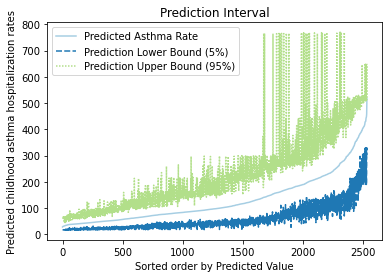

In [50]:
# Sort the value from low to high predicted value
variables = ['predicted', 'q_low', 'q_high']
pred_interval = out_sdef[variables].sort_values(variables)
pred_interval.reset_index(inplace=True)
pred_interval = pred_interval[variables]
pred_interval = pred_interval.rename(columns={"q_low": "Prediction Lower Bound (5%)",
"q_high": "Prediction Upper Bound (95%)",
"predicted": "Predicted Asthma Rate"})
# Create a line plot to display the 90% prediction interval
pred_interval_plot = sns.lineplot(data=pred_interval, palette="Paired")
pred_interval_plot.set(title="Prediction Interval", xlabel="Sorted order by Predicted Value",
ylabel="Predicted childhood asthma hospitalization rates")